The purpose of this notebook is to read the full enzyme database into a notebook, and to begin to explore promiscuous enzymes, and how to pull data on linked reactions

In [21]:
# imports

from Bio.KEGG import REST
from Bio.KEGG import Enzyme
from Bio.KEGG import Compound

import gzip
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# solution: read data directly from the text file instead

enzyme_fields = [method for method in dir(Enzyme.Record()) if not method.startswith('_')]
data_matrix = []

with gzip.open('../datasets/KEGG_enzymes_all_data.gz', 'rt') as file:
    for record in Enzyme.parse(file):
        data_matrix.append([getattr(record, field) for field in enzyme_fields])

In [3]:
# make dataframe

enzyme_df = pd.DataFrame(data_matrix, columns=enzyme_fields)

In [4]:
enzyme_df.shape

(7524, 16)

In [5]:
enzyme_df.head()

,classname,cofactor,comment,dblinks,disease,effector,entry,genes,inhibitor,name,pathway,product,reaction,structures,substrate,sysname
0,"[Oxidoreductases;, Acting on the CH-OH group o...",[],[A zinc protein. Acts on primary or secondary ...,"[(ExplorEnz - The Enzyme Database, [1.1.1.1]),...",[],[],1.1.1.1,"[(HSA, [124, 125, 126, 127, 128, 130, 131]), (...",[],"[alcohol dehydrogenase, aldehyde reductase, AD...","[(PATH, ec00010, Glycolysis / Gluconeogenesis)...","[aldehyde [CPD:C00071], NADH [CPD:C00004], H+ ...",[(1) a primary alcohol + NAD+ = an aldehyde + ...,[],"[primary alcohol [CPD:C00226], NAD+ [CPD:C0000...",[alcohol:NAD+ oxidoreductase]
1,"[Oxidoreductases;, Acting on the CH-OH group o...",[],[A zinc protein. Some members of this group ox...,"[(ExplorEnz - The Enzyme Database, [1.1.1.2]),...",[],[],1.1.1.2,"[(HSA, [10327]), (PTR, [741418]), (PPS, [10099...",[],"[alcohol dehydrogenase (NADP+), aldehyde reduc...","[(PATH, ec00010, Glycolysis / Gluconeogenesis)...","[aldehyde [CPD:C00071], NADPH [CPD:C00005], H+...",[an alcohol + NADP+ = an aldehyde + NADPH + H+...,[],"[alcohol [CPD:C00069], NADP+ [CPD:C00006]]",[alcohol:NADP+ oxidoreductase]
2,"[Oxidoreductases;, Acting on the CH-OH group o...",[],[The yeast enzyme acts most rapidly with NAD+;...,"[(ExplorEnz - The Enzyme Database, [1.1.1.3]),...",[],[],1.1.1.3,"[(NVE, [NEMVE_v1g225948]), (ATH, [AT1G31230, A...",[],"[homoserine dehydrogenase, HSDH, HSD]","[(PATH, ec00260, Glycine, serine and threonine...","[L-aspartate 4-semialdehyde [CPD:C00441], NADH...",[L-homoserine + NAD(P)+ = L-aspartate 4-semial...,[],"[L-homoserine [CPD:C00263], NAD+ [CPD:C00003],...",[L-homoserine:NAD(P)+ oxidoreductase]
3,"[Oxidoreductases;, Acting on the CH-OH group o...",[],[Also converts diacetyl into acetoin with NADH...,"[(ExplorEnz - The Enzyme Database, [1.1.1.4]),...",[],[],1.1.1.4,"[(SCE, [YAL060W, YAL061W]), (KLA, [KLLA0_F0050...",[],"[(R,R)-butanediol dehydrogenase, butyleneglyco...","[(PATH, ec00650, Butanoate metabolism)]","[(R)-acetoin [CPD:C00810], NADH [CPD:C00004], ...","[(R,R)-butane-2,3-diol + NAD+ = (R)-acetoin + ...",[],"[(R,R)-butane-2,3-diol [CPD:C03044], NAD+ [CPD...","[(R,R)-butane-2,3-diol:NAD+ oxidoreductase]"
4,"[Oxidoreductases;, Acting on the CH-OH group o...",[],[Transferred entry: acetoin dehydrogenase. Now...,[],[],[],1.1.1.5,[],[],[Transferred to 1.1.1.303 and 1.1.1.304],[],[],[],[],[],[]


In [6]:
# apply a boolean mask to the dataframe to select only rows in which the number of reaction entries is > 1

promiscuous_df = enzyme_df[[True if len(rxn) > 1 else False for rxn in enzyme_df['reaction']]]

In [7]:
# how many promiscuous enzymes are there?

promiscuous_df.shape

(549, 16)

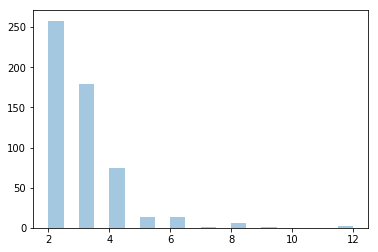

In [8]:
# histogram of total reactions per enzyme EC category

reactions = [len(rxn) for rxn in promiscuous_df['reaction']]

hist = sns.distplot(reactions, bins=20, kde=False, norm_hist=False)

In [13]:
# example product field

enzyme_df.iloc[0]['product']

['aldehyde [CPD:C00071]',
 'NADH [CPD:C00004]',
 'H+ [CPD:C00080]',
 'ketone [CPD:C01450]']

In [28]:
# test pull CPD record from KEGG
# note: this doesn't appear to work if CPD is in caps

cpd_entry_71 = (REST.kegg_get('cpd:c00071').read())

In [29]:
cpd_entry_71

'ENTRY       C00071                      Compound\nNAME        Aldehyde;\n            RCHO\nFORMULA     CHOR\nCOMMENT     Generic compound in reaction hierarchy\nREACTION    R00538 R00544 R00623 R00625 R00631 R00634 R00635 R00636 \n            R00637 R00638 R00639 R01409 R01853 R01854 R02745 R03415 \n            R07158 R07210 R07326 R07328 R08372 R09359 R09480 R10388 \n            R10713 R10911 R10912 R11354\nPATHWAY     map00071  Fatty acid degradation\nENZYME      1.1.1.1         1.1.1.2         1.1.1.71        1.1.2.7         \n            1.1.3.13        1.1.9.1         1.1.99.20       1.2.1.3         \n            1.2.1.4         1.2.1.5         1.2.3.1         1.2.5.2         \n            1.2.7.5         1.2.99.6        1.2.99.7        1.4.3.4         \n            1.4.3.21        1.7.3.1         1.14.14.5       3.3.2.2         \n            4.1.1.1         4.1.2.10        4.1.2.11        4.1.2.47\nDBLINKS     PubChem: 3371\n            ChEBI: 17478\nATOM        3\n            1

In [ ]:
# to do: parse out KEGG reaction & compound IDs from reaction, substrate, & product fields of promiscuous dataframe
# add these as additional columns in dataframe



In [ ]:
# to do: pull KEGG records for each of the extracted reaction & compound IDs



In [ ]:
# to do: join KEGG records back into dataframe

